# Loading Data

1. Load mnist_test.csv from https://www.kaggle.com/datasets/oddrationale/mnist-in-csv?select=mnist_test.csv as data.

2. Split data into X and y. X should have the shape as (10000,784) and y should have the shape as (10000,1).

3. Split X and y into the train set (80%) and the test set (20%). The train set is for fitting your model while the test set is for evaluating your model. As a result, you will have X_train.shape as (8000,784), y_train.shape as (8000,1), X_test.shape as (2000,784),and y_test.shape as (2000,1). (Hint: use sklearn.model_selection.train_test_split.) 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Add your code to this 

data_pd = pd.read_csv("mnist_test.csv")
data_pd
data = np.array(data_pd)

X = data[:,1:]
y = data[:,0]
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10000, 784) (10000,)
(8000, 784)
(2000, 784)
(8000, 1)
(2000, 1)


## Fitting and Evaluating Your Model
1. Use sklearn.linear_model.RidgeClassifier to fit X_train and y_train to get a multi-class classification model. 
2. Test your model on (X_test, y_test) and get testing accuracy by using clf.score(X_test, y_test) assuming your model is named as "clf".

In [14]:
from sklearn.linear_model import RidgeClassifier

# Add your code here
clf = RidgeClassifier()
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
acc

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:1059: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8445

## Optimizing the RidgeClassifier
1. In sklearn.linear_model.RidgeClassifier, there is one argument called "alpha" corresponding to the coefficient for the regularization. By default, alpha is equal to 1. There are benefits and drawbacks to having a large alpha. The larger is the alpha, the more likely you are going to have underfitting problems with your graph. Higher alpha does not necessarily mean better results. On the other hand, a low alpha may lead to overfitting problems and a more complicated model. 

  More information: https://towardsdatascience.com/preventing-overfitting-with-lasso-ridge-and-elastic-net-regularization-in-machine-learning-d1799b05d382

  Please try different alpha to train your model and evaluate your model's test accuracy. Note: you cannot try number ranges such as (1-10) or (1-50), these numbers are too similar. (Hint: you'll want try alphas that are different powers of 10.) Out of what you chose, what is the best choice for alpha in MNIST classification?

  **my answer: 10000000**



In [21]:
# 1 
# Add your code to this 
acc_best = 0
for p in range(10): 
  clf = RidgeClassifier(alpha = 10**p)
  clf.fit(X_train, y_train)
  acc = clf.score(X_test, y_test)

  if acc > acc_best:
    acc_best = acc
    clf_best = clf

print(f"\nbest clf is {clf_best} with acc: {acc_best}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:1059: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:1059: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:1059: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:1059: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 


best clf is RidgeClassifier(alpha=10000000) with acc: 0.851


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:1059: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2. Instead of fitting the full dimension (784) of data to the RidgeClassifier, you can apply PCA to the data (PCA over X with the shape 10000*784) to reduce the dimension from 784 to 100 (for example) and train another RidgeClassifier with 100-dimension features. 

  Typically, we want the explained variance to be between 95–99% (which is what we would set n_components to). With alpha=1, iterate through the array 0.95-0.99 ([0.95, 0.96, ...., 0.99]) and set n_components to the value you're currently on in the array. Each time, print the shape of X_reduced to get the number of components that are left from the second value in the tuple. For example, (10000, 168) has 168 components left. For further explanation, see the scikit learn PCA function documentation: 
  > if 0 < n_components < 1 and svd_solver == ‘full’, select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components
 
  Then, set n_components to 784 and run again. I should see the results from 0.95-0.99 variance as well as the result of running n_components = 784 in your answer. Then answer this question: what is the best reduced dimension number of components to get the highest test accuracy? (Hint: after applying PCA to 10000 samples, remember to split train and test.)
  
  More information on variance and PCA:  https://stackoverflow.com/questions/32857029/python-scikit-learn-pca-explained-variance-ratio-cutoff


In [22]:
# 2 
# Add your code to this 
from sklearn.decomposition import PCA

acc_best = 0
for i in [0.95,0.96,0.97,0.98,0.99]:
  pca = PCA(n_components = i, svd_solver= 'full')
  data_reduced = pca.fit_transform(X)
  print(f"when n_components is {i}, the shape of X_reduced is {data_reduced.shape}")
  y = y

  Xr_train, Xr_test, yr_train, yr_test = train_test_split(data_reduced, y, test_size=0.2)
  yr_train = yr_train.reshape(-1,1)
  yr_test = yr_test.reshape(-1,1)


  clf = RidgeClassifier(alpha = 1)
  clf.fit(Xr_train, yr_train)
  acc = clf.score(Xr_test, yr_test)
  print(f"the accuarcy is {acc}")

  if acc > acc_best:
    acc_best = acc
    best_shape = data_reduced.shape
    best_components = i

print(f"\n When alpha = 1, best n_components is {best_components} with acc: {acc_best}, and the best shape of is {best_shape} ")



pca = PCA(n_components =784)
data_reduced = pca.fit_transform(X)
print(f"\nwhen n_components is {784}, the shape of X_reduced is {data_reduced.shape}")
y = y

Xr_train, Xr_test, yr_train, yr_test = train_test_split(data_reduced, y, test_size=0.2)
yr_train = yr_train.reshape(-1,1)
yr_test = yr_test.reshape(-1,1)


clf = RidgeClassifier(alpha = 1)
clf.fit(Xr_train, yr_train)
acc = clf.score(Xr_test, yr_test)
print(f"the accuarcy is {acc}")


when n_components is 0.95, the shape of X_reduced is (10000, 149)
the accuarcy is 0.868


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:1059: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when n_components is 0.96, the shape of X_reduced is (10000, 174)
the accuarcy is 0.8685


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:1059: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when n_components is 0.97, the shape of X_reduced is (10000, 207)
the accuarcy is 0.864


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:1059: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when n_components is 0.98, the shape of X_reduced is (10000, 253)
the accuarcy is 0.869


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:1059: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


when n_components is 0.99, the shape of X_reduced is (10000, 323)
the accuarcy is 0.8485

 When alpha = 1, best n_components is 0.98 with acc: 0.869, and the best shape of is (10000, 253) 


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:1059: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



when n_components is 784, the shape of X_reduced is (10000, 784)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:1059: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


the accuarcy is 0.841


## Confusion Matrix and Classification Report
1. Read https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html to understand how to use a confusion matrix. Based on the information you learned from #1, can you plot the confusion matrix accordingly? (Hint: use clf.predict(X_test) to get the prediction labels over X_test.)



when n_components is 0.95, the shape of X_reduced is (10000, 253)
(2000, 1) (2000,)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:1059: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


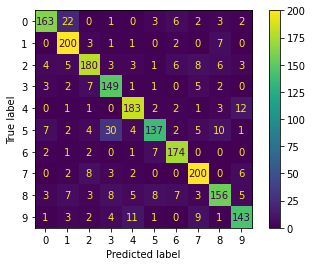

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

# Add your code here
pca = PCA(n_components = 0.98,  svd_solver= 'full')
data_reduced = pca.fit_transform(X)
print(f"when n_components is {0.95}, the shape of X_reduced is {data_reduced.shape}")
X_reduced = data_reduced[:,1:]
y = y

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

clf = RidgeClassifier(alpha = 10000000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(y_test.shape, y_pred.shape)
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm).plot()

2. Read https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report to understand how to use a classification report. Based on the information you learned in #3, can you output the classification report accordingly? What is the label with the lowest precision?

**my answer: 3**

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       202
           1       0.82      0.93      0.87       214
           2       0.86      0.82      0.84       219
           3       0.75      0.88      0.81       170
           4       0.87      0.89      0.88       205
           5       0.86      0.68      0.76       202
           6       0.87      0.93      0.90       187
           7       0.86      0.90      0.88       221
           8       0.83      0.76      0.79       205
           9       0.83      0.82      0.82       175

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000

